# RPG dice roller

This notebook demonstrates how we can develop a roleplaying game dice roller.

# Input specs

A RPG dice roller expression follows the following syntax:

```
[<dice count>]d<die num>[(+|-)<mod>]
```

* `dice count` is an optional (positive) number defining how many dice to roll (or how often to roll a single die and sum up the results)
  This number is optional. If not given defaults to 1.
* `die num` defines the number of sides the die must have. Valid numbers are 2, 3, 4, 6, 8, 10, 12, 20, 50 and 100
* `mod` defines a modifier to apply - a fixed number to either add or subtract from the die/dice roll result.
  `mod` and its preceding sign are optional (either sign and number are given or none of them). If no modifier has been given it defaults to 0.

## Examples

* `d20` means to roll a single 20-sided die
* `d20+2` means to roll a single 20-sided die and add `2` to the result
* `3d8-5` means to roll three eight-sided dice, add their numbers and subtract `5` from the result

# Natural result

For some of the rolls it is important to know what the _natural result_ is. The natural result is the result of the die/dice w/o applying the modifier.
I.e. when rolling `d20+2` a _natural one_ is ususally considered a _disaster_ where a _natural 20_ is a _triumphal success_.

In [25]:
from random import randrange

class Roll:
    def __init__(self, expr: str):
        expr = expr.lower()
        self.count = 1
        if expr[0] != 'd':
            (c, expr) = expr.split('d')
            self.count = int(c)
        else:
            expr = expr[1:]
    
        self.num_sides = 0
        self.mod = 0
        
        for idx, c in enumerate(expr):
            if c in ('+', '-'):
                self.mod = int(expr[idx:])
                self.num_sides = int(expr[:idx])
    
        if self.num_sides == 0:
            self.num_sides = int(expr)
        
        self.natural = sum(randrange(1, self.num_sides) for _ in range(self.count))

    @property
    def value(self):
        return self.natural + self.mod

    def __int__ (self):
        return self.value

    def __format__(self, format):
        match format:
            case 'd': return str(int(self))
            case 'f': return f"{str(self)}: {self.value} ({self.natural}{self.mod:+})"
            case _: raise TypeError('unsupported format string')
    
    def __str__(self):
        return f"{'' if self.count == 1 else self.count}d{self.num_sides}{'' if self.mod == 0 else f"{self.mod:+}"}"
    
    def __repr__(self):
        return f"Roll({str(self)})"

print(f"Rolling {Roll('d20'):f}")
print(f"Rolling {Roll('d20-1'):f}")
print(f"Rolling {Roll('3d8+2'):f}")

Rolling d20: 7 (7+0)
Rolling d20-1: 17 (18-1)
Rolling 3d8+2: 10 (8+2)


# Stochastic analysis

Lets see how well the results are distributed. We do this by using `matplotlib` to render a histogram.

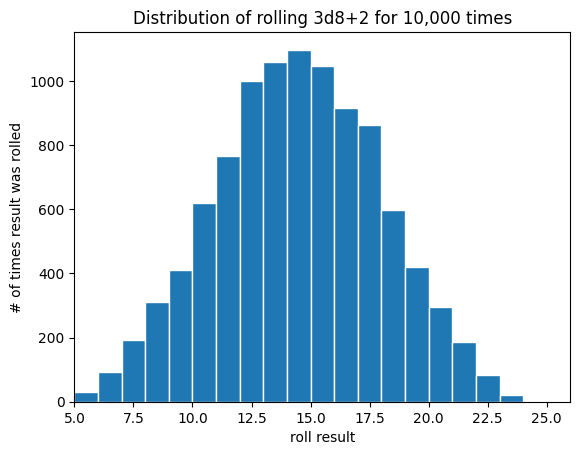

In [26]:
import matplotlib.pyplot as plt

samples = [int(Roll('3d8+2')) for _ in range(10000)]

_, ax = plt.subplots()
ax.hist(samples, bins=range(5, 26), linewidth=1, edgecolor="white")
ax.set(xlim=(5, 26),
    title='Distribution of rolling 3d8+2 for 10,000 times',
    xlabel='roll result',
    ylabel='# of times result was rolled')

plt.show()